# 6.2. 순환 신경망의 작동원리
- 각 층의 뉴런이 포워드 피드 되는 것 이외에 본인 층으로 순환되어 돌아오는 것이 하나 더 있다고 생각하면 됨
- 예를 들어 세개의 입력이 들어와서 4개의 노들를 가진 은닉층 두개를 거친다고 가정
    - 첫 층의 은닉층의 값이 다음 은닉층으로 피드 되면서 동시에 해당 은닉층의 입력으로 다시 들어감
    - 즉 매 시간마다 새로운 입력값이 들어오고 결과가 계산된다고 가정하면, t=0일 때 한 번 값들이 계산될 것이며, t = 1 일때도 또 한 번 계산이 됨
    - 즉 t=1인 상황에서 은닉층 1번에는 t=1인 입력값과 t=0에서 동일 은닉층을 통과한 특정 값이 들어오게 됨
        - 일반적인 신경망에서는 값이 하나만 들어오지만, 얘는 값이 두 개 들어오는 꼴
    - 이는 은닉층 각 노드의 값은 이전 시간의 은닉층 값과 현재 시간의 입력값으로 조합되는 값이 계산된다고 생각하면 됨
        - pytorch라는 값이 있다면, 전에 p가 들어왔다는 것을 기억하고 있는 상태에 y값이 새로 들어오면, 그 다음 알파벳이 무엇인지 예측하는 방식이라고 하면 됨
    - 은닉층이 두 개라고 가정했는데, 두 번째 은닉층에서도 동일함
    - 그 결과 은닉층 그림은 아래와 같이 되는 것임
    - 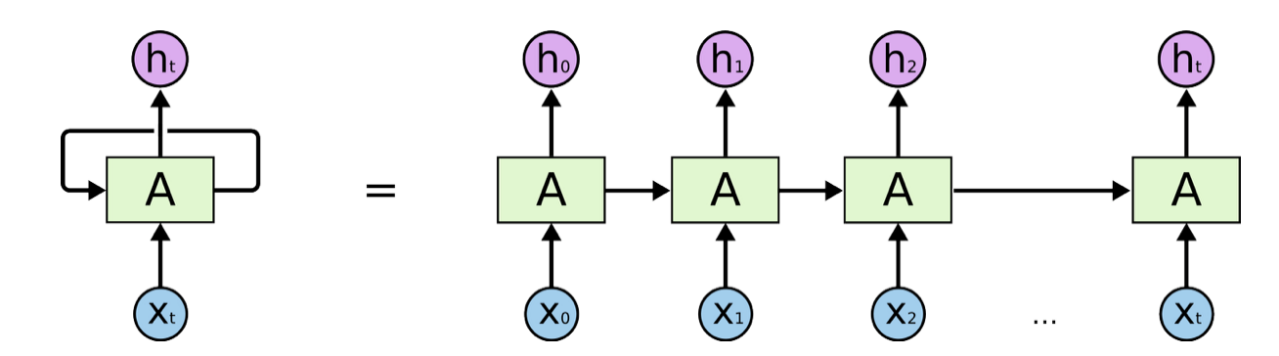

- 다시 정리하자면, 은닉층의 노드들은 특정 초깃값을 갖고 있음
- 그리고 첫 입력값이 들어온 t = 0 시점에서 입력값과 초깃값을 조합하여 은닉층의 값을 계산하기 시작
- 이 시점에 결과값이 도출되면 t = 1 시점에서는 새로운 입력값과 t = 0 시점에서 계산된 은닉층의 결과의 조합으로 t = 1일 때 은닉층의 결과값을 다시 계산
    - 이 과정이 지정한 t 만큼 반복

- 일정 시간 모든 값이 계산된 이후에는 모델을 학습하기 위해 결괏값과 목푯값의 차이를 손실함수를 통해 계산하고 역전파해야함
    - 그런데 기존 일반적인 신경망과는 다르게 순환 신경망은 시점 "t"의 영향을 받을 수밖에 없음
        - 즉, t = 0 ~ t = 2까지 계산에 사용되었다고 가정하면 그 시간 전체에 대해 역전파를 수행해야하는 것
        - 이를 **시간에 따른 역전파 : backpropagation through time(BPTT)** 라고 함

- pytorch라는 단어를 예를 들면
    - t = 0 에서 입력값 x0 = p 가 들어옴
        - 우리는 t = 0일 때 결과값을 y로 기대
        - 즉, y_0 은 y 이며, y_hat_0 이 y가 아니라면, 손실이 생길 것
    - t = 1 에는 입력값 x1 = y 가됨
        - 그러면 y1 = t
    - t = 2 에서는 x2 = t
        - 그러면 y2 = o
- 이 때 모델을 학습하려면 t = 2 의 시점에서 발생한 손실을 역전파 해야함
    - 결국 손실을 입력과 은닉층들 사이의 가중치로 미분하여 손실에 대한 각각의 비중을 업데이트하면 됨
    - 그런데 이 때 문제가 발생하는데, 이 연산 과정에서 은닉층의 이전 시점 값들이 연산에 포함됨
    - 이 이전 시점의 값들은 또 다시 가중치, 입력값, 이전 시점의 값들로 조합됨
        - 즉, 다시 말해 t = 2 시점의 오차를 미분하려면, t = 2, t = 1, t = 0의 가중치, 입력값이 다 필요한 상황
    

- t = 2 인 시점만 떼어나 수식으로 써보면 다음과 같음
    - 일반적으로 순환 신경망에서는 하이퍼볼릭 탄젠트 활성화 함수를 사용하기 때문에 여기서도 하이퍼볼릭 탄젠트를 이용함
- 그림이 없으므로 말로 그림을 설명
    - t = 2 일 때 입력값이 들어오며 은닉층1을 통과하여 h1을 뱉으며, 2를 통과하여 h2를 뱉은 다음 출력되며 이 값을 y2와 비교
        - 이 때 은닉층 1에  h1_t=1 은닉층 2에 h2_t=1의 값이 영향을 줌
- o(output) = w_h0 * h2_out + bias
- h2_out = tanh(w12 * h1 + w22 * h2_t=1 + bias)
- h1_out = tanh(w1h * i + w11 * h1_t=1 + bias)
- h2_in = w_12 * h1 + w_22 * h2_t=1 + bias
- h1_in = w_ih * i + w_11 * h1_t=1 + bias
- do/dw22 = do/dh2_out * dh2_out/dh2_in * dh2_in/dw22
    - w22에 대한 기울기를 보면 h2_in을 미분하는데 이를 계산해보면 h2_t = 1이 나옴
        - 그런데 이 값은 이전 시점의 값들의 조합으로 이루어져있고 내부적으로도 w22를 포함하므로 제대로 이 값을 미분하기 위해서는 t = 0 값까지 미분해야함
        - 즉, 시점별로 t = 2 시점에서 발생한 손실은 t = 2, 1, 0 시점에 전부 영향을 주고 t = 1 시점의 손실은 t =1, 0에 영향을 주며, t = 0시점의 손실은 t = 0의 가중치에 영향을 줌
        - 그래서 실제로 업데이트할 때는 가중치에 대해 시점별 기울기를 다 더해서 한 번에 업데이트

# 6.3. 모델 구현, 학습 및 결과 확인
- 가장 기본적인 모델 진행

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [2]:
n_hidden = 25
lr = 0.01
epochs = 1000

string = "hello pytorch. how long can a rnn cell remember"
chars = "abcdefghijklmnopqrstuvwxyz ?!.,:;01" # one-hot 인코딩을 위해
char_list = [i for i in chars]
n_letters = len(char_list)

In [3]:
def string_to_onehot(string):
    start = np.zeros(shape = len(char_list), dtype = int)
    end = np.zeros(shape = len(char_list), dtype = int)
    start[-2] = 1
    end[-1] = 1
    
    for i in string:
        idx = char_list.index(i)
        zero = np.zeros(shape = n_letters, dtype = int)
        zero[idx] = 1
        start =np.vstack([start, zero])
    output = np.vstack([start, end])
    
    return output

In [4]:
def onehot_to_string(onehot):
    onehot_ = torch.Tensor.numpy(onehot)
    return char_list[onehot_.argmax()]

- 이번에는 순환신경망 클래스
    - 해당 클래스는 원핫 벡터로 변환된 단어 하나를 입력으로 받고 은닉층 하나를 통과시켜 결과값을 내는 구조로
    - 앞서 봤듯, 입력값이 들어오면 이전 시간의 은닉층 값과의 조합으로 새로운 은닉층 값을 생성하고 은닉층에서 결괏갓ㅂ을 내는 부분의 연산을 한 번 더 통과하여 결괏값이 나오게 됨
    - 그리고 이전 시간의 은닉층 연산값이 없는 초기의 은닉층 값은 0으로 초기화해야함

In [5]:
class RNN(nn.Module):
    # init에서 기본적인 신경망 구조를 짜줌
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.i2o = nn.Linear(hidden_size, output_size)
        self.act_fn = nn.Tanh()
    # 그 다음 순전파 함수를 짜줌
    def forward(self, input, hidden):
        hidden = self.act_fn(self.i2h(input) + self.h2h(hidden))
        output = self.i2o(hidden)
        return output, hidden
    # 초기 히든레이어의 은닉층값 초기화
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)
    
rnn = RNN(n_letters, n_hidden, n_letters)

In [6]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr = lr)

In [7]:
one_hot = torch.from_numpy(string_to_onehot(string)).type_as(torch.FloatTensor())

for i in range(epochs):
    rnn.zero_grad()
    total_loss = 0
    hidden = rnn.init_hidden() # t = 0 인 시점에서 값 초기화
    
    for j in range(one_hot.size()[0]-1):
        input_ = one_hot[j:j+1, :]
        target = one_hot[j + 1]
        
        output, hidden = rnn.forward(input_, hidden)
        loss = loss_func(output.view(-1), target.view(-1))
        total_loss += loss
        input_ = output
        
    total_loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(total_loss)

tensor(2.7484, grad_fn=<AddBackward0>)
tensor(1.1126, grad_fn=<AddBackward0>)
tensor(0.8445, grad_fn=<AddBackward0>)
tensor(0.6469, grad_fn=<AddBackward0>)
tensor(0.5005, grad_fn=<AddBackward0>)
tensor(0.3921, grad_fn=<AddBackward0>)
tensor(0.3079, grad_fn=<AddBackward0>)
tensor(0.2676, grad_fn=<AddBackward0>)
tensor(0.2530, grad_fn=<AddBackward0>)
tensor(0.1999, grad_fn=<AddBackward0>)
tensor(0.1813, grad_fn=<AddBackward0>)
tensor(0.1615, grad_fn=<AddBackward0>)
tensor(0.1564, grad_fn=<AddBackward0>)
tensor(0.1439, grad_fn=<AddBackward0>)
tensor(0.1366, grad_fn=<AddBackward0>)
tensor(0.1290, grad_fn=<AddBackward0>)
tensor(0.1212, grad_fn=<AddBackward0>)
tensor(0.1150, grad_fn=<AddBackward0>)
tensor(0.1195, grad_fn=<AddBackward0>)
tensor(0.1045, grad_fn=<AddBackward0>)
tensor(0.1026, grad_fn=<AddBackward0>)
tensor(0.1259, grad_fn=<AddBackward0>)
tensor(0.0961, grad_fn=<AddBackward0>)
tensor(0.0925, grad_fn=<AddBackward0>)
tensor(0.0873, grad_fn=<AddBackward0>)
tensor(0.0828, grad_fn=<A

In [8]:
start = torch.zeros(1, len(char_list))
start[:, -2] = 1

with torch.no_grad():
    hidden = rnn.init_hidden()
    
    input_ = start
    output_string = ""
    
    for i in range(len(string)):
        output, hidden = rnn.forward(input_, hidden)
        output_string += onehot_to_string(output.data)
        input_ = output
        

print(output_string)

hello  ro  errn  rrn  ern  ern  ero  emo  rnn r


- 너무 단순한 모델이며 학습된 데이터가 매우 적어 만족스러운 결과가 나오지는 않음

# 6.4. 순환 신경망의 한계 및 개선 방안
- 지금은 한 문장이라서 문제가 발생한 것도 있지만, 순환 신경망의 근본적인 구조상의 원인도 있음
- 이러한 현상은 타임 시퀀스가 늘어나며, 역전파시 하이퍼볼릭 탄젠트 함수의 미분 값이 여러번 곱해져서 시퀀스가 길어질 때, 점점 전달되어야할 기울기가 사라져버리는 현상이 발생함
    - 이를 **기울기 소실(vanishing dicent)** 라고 함

### LSTM(long short term memory)
- 순환신경망 모델에 장기기억을 담당하는 부분을 추가한 것
- 기존에는 은닉 상태만 있었다면, 이번에는 셀상태라는 전달 부분을 추가한 것

- 기존 RNN
    - 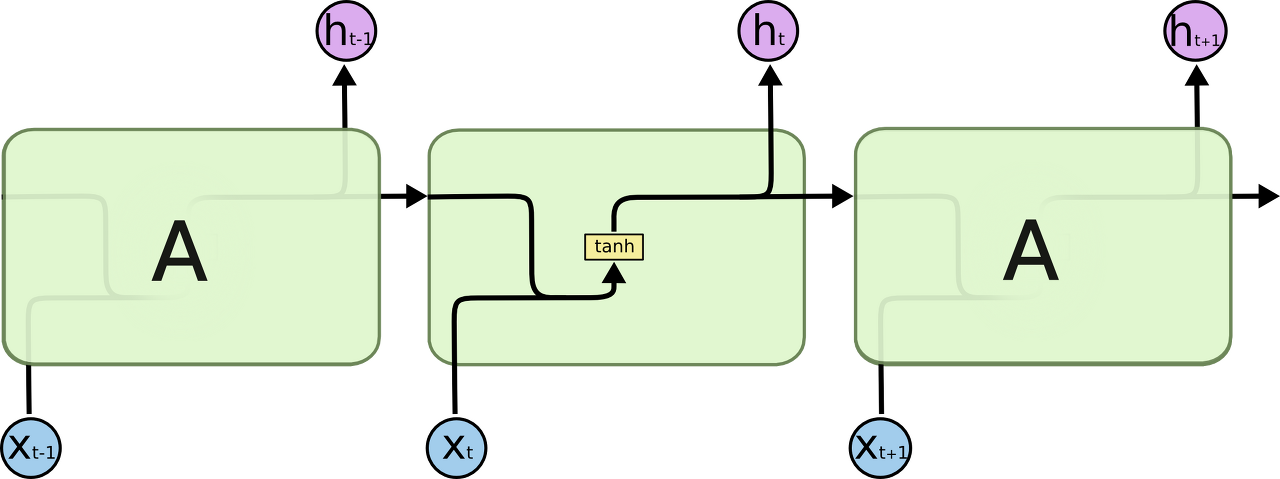

- LSTM
    - 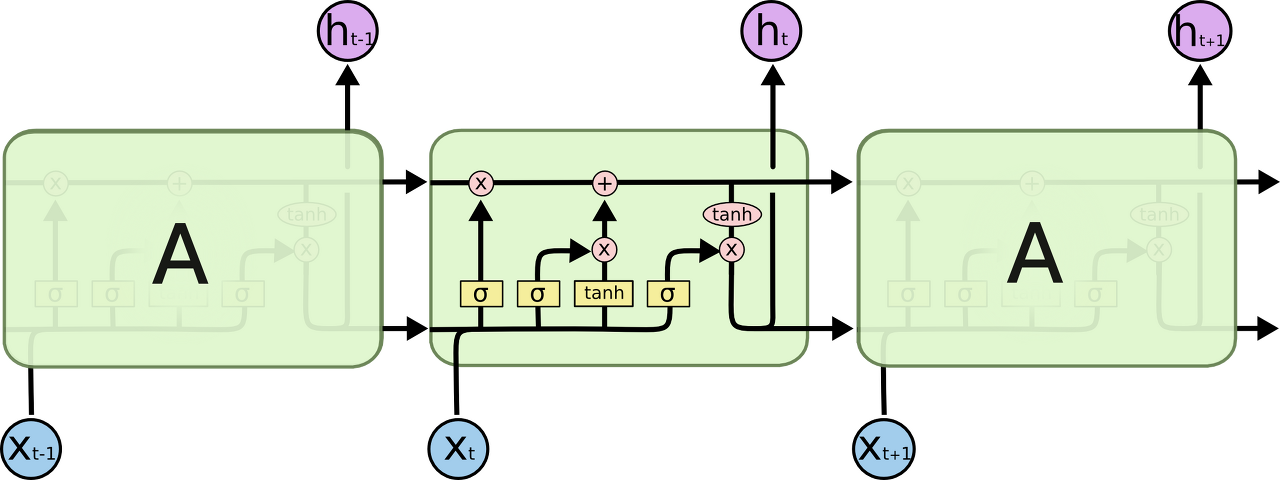

- 그림으로만 봐도 좀 복잡하지만, 은닉층 하나만 떼어내어 살펴보자
    - 우선 셀 상단의 우향 직선을 보자 : **셀 상태**
        - x는 기존의 정보를 얼마나 남길 것인지에 따라 비중을 곱하는 부분
        - 더하기는 현재 들어온 데이터와 기존 은닉 상태를 통해 정보를 추가하는 부분
    - A에서 연결되는 가장 좌하단의 게이트 : **망각 게이트**
        - f1 = sigma(W_if * xt + b_if + W_hf * h_t-1 + b_hf)
            - 이름 그대로 기존의 정보들로 구성된 셀 상태의 값을 얼마나 잊어버릴 지 정하는 부분
            - sigma는 sigmoid함수를 의미함
            - 현재 시점의 입력과 직전 시점의 은닉 상태값을 입력으로 받는 한 층의 인공 신경망이라고 보면 간단히 이해할 수 있음
            - 시그모이드 함수이기 때문에 결과적으로는 0 ~ 1의 값이 출력되며, 기존의 값을 어느정도 비율로 전달할지를 정한다고 보면 됨
    - 현재 상태의 입력값과 연결되는 좌하단 게이트 : **입력 게이트**
        - i_t = sigma(W_ii * xt + b_ii + W_hi * h_t-1 + b_hi)
        - C_t_hat = tanh(W_iC * xt + b_ic + W_hc * h_t-1 + b_hc)
            - 어떤 정보를 얼만큼 셀 상태에 새로 저장할지 정하는 부분이라고 생각하면 됨
            - 입력 게이트도 기존 방식과 비슷하게 ㅅ새로운 입력값과 이전 시점의 은닉 상태값을 받아서 시그모이드에 한 차례, 하이퍼볼릭 탄젠트 활성화 함수에 한 차례 통과시킴
            -  하이퍼볼릭 탄젠트를 통과할 경우 -1 ~ 1 사이의 값을 가지고 시그모이드를 통과할 경우 0 ~ 1값을 가짐
                - 따라서 하이퍼볼릭을 통과하여 새롭게 셀 상태에 추가할 정보가 되며, 얼마나 셀 상태에 더해줄 지 그 신호의 비중을 시그모이드로 결정해줌
- 위 내용을 한 번 정리하면, 현재 시점의 새로운 입력과 직전 시점의 은닉 상태 값의 조합으로 기존의 셀 상태의 정보를 얼마만큼 전달할지도 정하고, 어떤 정보를 전달할지도 정하고, 얼마만큼의 비중으로 더할지도 정하는 것
    - 셀 상태 수식 : c_t = f_t * c_t-1 + i_t * C_t_hat
- 은닉 상태의 업데이트는 아래 수식과 같음
    - h_t = o_t * tanh(c_t)
        - 시그모이드로 비중을 정하는 부분은 동일하며, 새로운 은닉 상태는 업데이트된 셀 상태값을 -1 ~ 1 사이의 비중을 곱한 값으로 생성함

- LSTM은 RNN보다 일반적으로 성능이 좋으며, 가장 기본이 되는 모델로 활용함

### GRU : gated recurrent unit
- LSTM보다 구조는 간단하나 성능은 꽤 좋은 RNN의 변형 형태
- 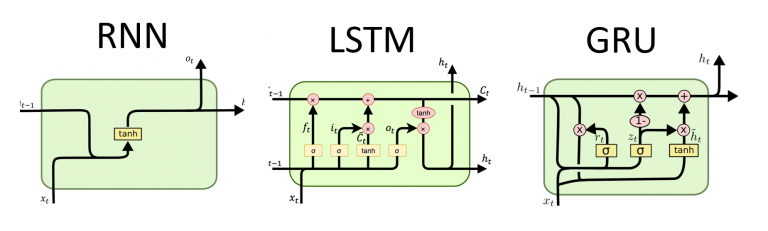

- 수식은 다음과 같음
    - r_t = sigma(W_ir * x_t + b_ir + W_hr * h_t-1) + b_br)
    - z_t = sigma(W_iz * x_t + b_iz + W_hz * h_t-1) + b_bz)
    - h_t_hat = tanh(W_in * x_t + b_in + r_i * (W_hn * h_t-1 + b_hn))
    - h_t = (1 - z_t) * h_t_hat + z_t * h_t-1

- LSTM의 경우 셀 상태와 은닉 상태를 분리했으나, GRU는 그렇지 않음
    - 첫 수식은 업데이트 게이트로 현재 시점의 새로운 입력과 직전 시점의 은닉 상태 값에 가중치를 곱하고 시그모이드를 통과시켜 업데이트 비중을 결정
    - 두 번째 수식은 리셋 게이트로 업데이트 게이트와 같은 입력을 받아 동일하게 시그모이드로 비중을 정함
        - 이 비중은 그 다음 수식에서 h_t_hat을 구할 때 기존 은닉 상태값을 얼마나 반영할지 결정하는데 사용
    - 세 번째 수식은 기존의 은닉 상태에 가중치가 곱해진 값과 새로운 입력값을 받아 가중칠플 곱한 후 마지막에 하이퍼볼릭 탄젠트를 통과시켜 새로운 정보를 리턴
    - 마지막 수식으로 새로은 은닉상태로 구함

### 임베딩
- 알파벳이나 단어같은 기본 단위 요소를 일정 길이를 가지는 벡터 공간에 투영시키는 것
- 워드 임베딩은 일정한 크기의 벡터에 단어들을 투영하는 방법이라고 이해하면 쉬움
    - 이를 word2vec이라 하며, 기본적으로 CBOW와 skip-gram기법이 있음

##### CBOW
- 주변 단어들로부터 가운데 들어갈 단어가 나오도록 임베딩

##### skip-gramp
- 중심 단어를 바탕으로 주변 단어가 나오도록 학습